In [43]:
import pandas as pd
import numpy as np
# Specify the path to the CSV file
file_path = 'heart_attack_indonesia.csv'

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(file_path)
# data = data.sample(frac=0.05, random_state=42)
data = data.sample(n=1000, random_state=42)
# Display the first few rows of the DataFrame
print("Data loaded successfully. Here are the first few rows:")
print(data.head())

# Display column names to verify structure
print("\nColumns in the dataset:")
print(data.columns.tolist())


Data loaded successfully. Here are the first few rows:
            ID       State  Age HeartAttack  Gender  Cholesterol  \
42257    42258        Bali   47          No  Female          166   
114306  114307  Balikpapan   49          No    Male          266   
146660  146661   Pekanbaru   48         Yes    Male          183   
24788    24789    Surabaya   48          No    Male          286   
87664    87665    Makassar   55         Yes    Male          236   

       SmokingHabits PhysicalActivity   BMI Hypertension  ... EducationLevel  \
42257         Smoker              Low  30.3           No  ...      Secondary   
114306    Non-smoker              Low  29.6           No  ...        Primary   
146660    Non-smoker             High  30.9          Yes  ...      Secondary   
24788         Smoker         Moderate  23.6          Yes  ...         Higher   
87664         Smoker         Moderate  25.8           No  ...        Primary   

       MaritalStatus FamilyHistoryHeartDisease IncomeLe

In [44]:
# Step 1: Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

Missing values in each column:
ID                             0
State                          0
Age                            0
HeartAttack                    0
Gender                         0
Cholesterol                    0
SmokingHabits                  0
PhysicalActivity               0
BMI                            0
Hypertension                   0
Diabetes                       0
AlcoholConsumption           325
DietType                       0
OccupationType                 0
StressLevel                    0
EducationLevel                 0
MaritalStatus                  0
FamilyHistoryHeartDisease      0
IncomeLevel                    0
HealthcareAccess               0
SleepHours                     0
UrbanOrRural                   0
AirQualityIndex                0
PollutionLevel                 0
EmploymentStatus               0
dtype: int64


In [45]:
# Fill or drop missing values
# Example: Replace missing values in numerical columns with the median
for col in data.select_dtypes(include=[np.number]).columns:
    data[col].fillna(data[col].median(), inplace=True)

# For categorical columns, replace missing values with the mode
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

C:\Users\varkumar\AppData\Local\Temp\ipykernel_45312\3605543277.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\varkumar\AppData\Local\Temp\ipykernel_45312\3605543277.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [46]:
# Step 2: Validate data types
print("\nData types before conversion:")
print(data.dtypes)


Data types before conversion:
ID                             int64
State                         object
Age                            int64
HeartAttack                   object
Gender                        object
Cholesterol                    int64
SmokingHabits                 object
PhysicalActivity              object
BMI                          float64
Hypertension                  object
Diabetes                      object
AlcoholConsumption            object
DietType                      object
OccupationType                object
StressLevel                   object
EducationLevel                object
MaritalStatus                 object
FamilyHistoryHeartDisease     object
IncomeLevel                   object
HealthcareAccess              object
SleepHours                   float64
UrbanOrRural                  object
AirQualityIndex                int64
PollutionLevel                object
EmploymentStatus              object
dtype: object


In [47]:
# Convert columns to appropriate data types if necessary
data['HeartAttack'] = data['HeartAttack'].map({'Yes': 1, 'No': 0})  # Binary encoding for the target variable


In [48]:
# Step 3: Handle duplicates
print(f"\nNumber of duplicate rows: {data.duplicated().sum()}")
data.drop_duplicates(inplace=True)



Number of duplicate rows: 0


In [49]:
# Step 1: Drop irrelevant features based on domain knowledge
irrelevant_features = ['ID', 'State', 'OccupationType']
data = data.drop(columns=irrelevant_features, axis=1)

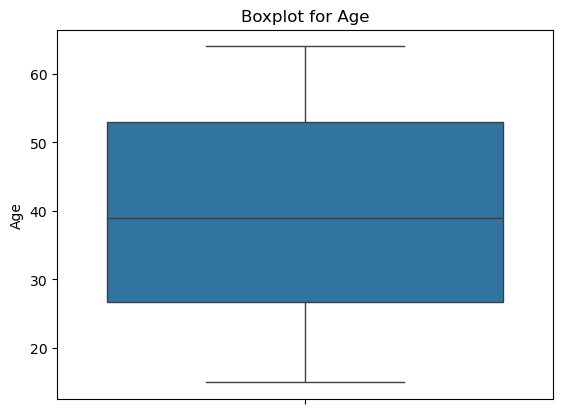

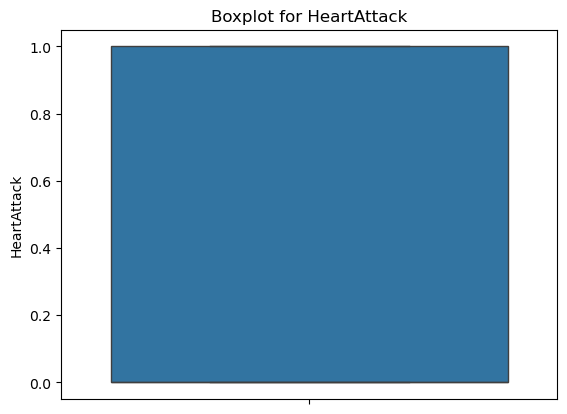

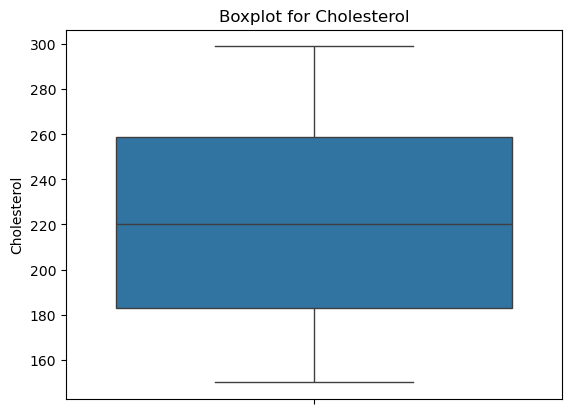

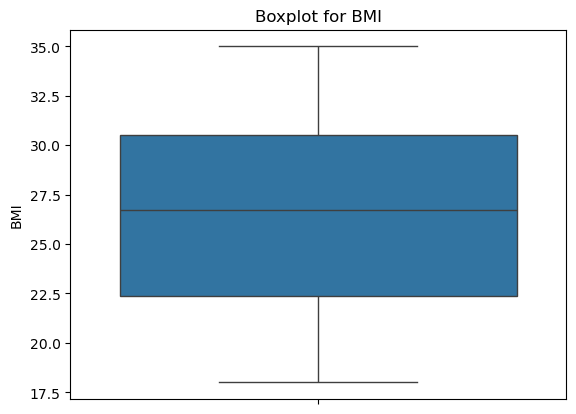

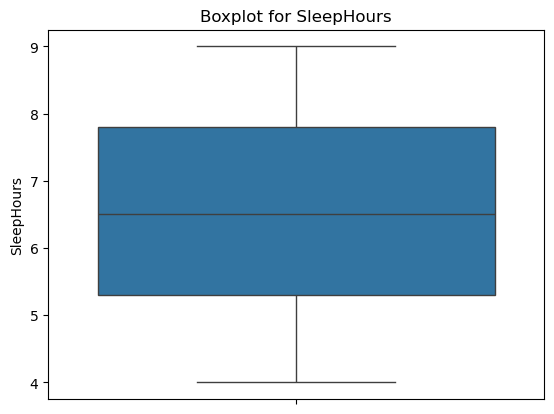

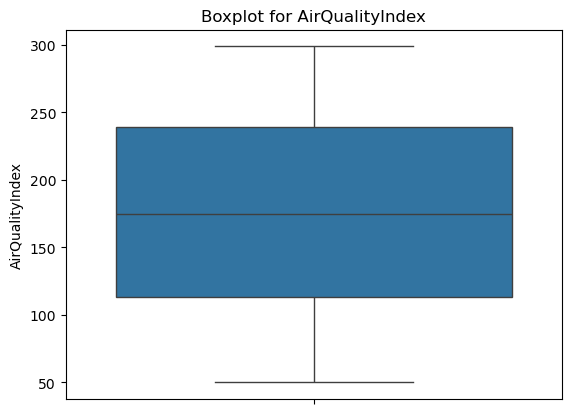

In [50]:
# Step 4: Check for outliers in numerical data
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = data.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    sns.boxplot(data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

In [51]:
# Optionally handle outliers (example: Winsorize or clip extreme values)
for col in ['Cholesterol', 'BMI', 'SleepHours']:
    data[col] = np.clip(data[col], data[col].quantile(0.05), data[col].quantile(0.95))

In [52]:
data.head()

,Age,HeartAttack,Gender,Cholesterol,SmokingHabits,PhysicalActivity,BMI,Hypertension,Diabetes,AlcoholConsumption,...,EducationLevel,MaritalStatus,FamilyHistoryHeartDisease,IncomeLevel,HealthcareAccess,SleepHours,UrbanOrRural,AirQualityIndex,PollutionLevel,EmploymentStatus
42257,47,0,Female,166,Smoker,Low,30.3,No,No,Rarely,...,Secondary,Single,Yes,High,Average,8.3,Urban,279,Low,Employed
114306,49,0,Male,266,Non-smoker,Low,29.6,No,No,Often,...,Primary,Married,No,Low,Poor,5.8,Urban,216,High,Employed
146660,48,1,Male,183,Non-smoker,High,30.9,Yes,No,Often,...,Secondary,Single,Yes,High,Poor,7.6,Urban,263,Moderate,Unemployed
24788,48,0,Male,286,Smoker,Moderate,23.6,Yes,No,Rarely,...,Higher,Married,No,Middle,Good,5.0,Urban,287,High,Employed
87664,55,1,Male,236,Smoker,Moderate,25.8,No,Yes,Often,...,Primary,Single,Yes,High,Average,7.6,Urban,138,High,Unemployed


In [53]:
# Step 5: Encode categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [54]:
# Step 6: Normalize/scale numerical features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [55]:
#Compute correlation matrix and drop features with weak correlation to target
correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['HeartAttack']
weak_correlation_features = correlation_with_target[correlation_with_target.abs() < 0.1].index.tolist()
print(f"Weak correlation features: {weak_correlation_features}")

Weak correlation features: ['Age', 'Cholesterol', 'BMI', 'SleepHours', 'AirQualityIndex', 'Gender_Male', 'SmokingHabits_Smoker', 'PhysicalActivity_Low', 'PhysicalActivity_Moderate', 'Hypertension_Yes', 'Diabetes_Yes', 'AlcoholConsumption_Rarely', 'DietType_Unhealthy', 'StressLevel_Low', 'StressLevel_Moderate', 'EducationLevel_Primary', 'EducationLevel_Secondary', 'MaritalStatus_Single', 'FamilyHistoryHeartDisease_Yes', 'IncomeLevel_Low', 'IncomeLevel_Middle', 'HealthcareAccess_Good', 'HealthcareAccess_Poor', 'UrbanOrRural_Urban', 'PollutionLevel_Low', 'PollutionLevel_Moderate', 'EmploymentStatus_Unemployed']


In [56]:
data.corr()

,Age,HeartAttack,Cholesterol,BMI,SleepHours,AirQualityIndex,Gender_Male,SmokingHabits_Smoker,PhysicalActivity_Low,PhysicalActivity_Moderate,...,MaritalStatus_Single,FamilyHistoryHeartDisease_Yes,IncomeLevel_Low,IncomeLevel_Middle,HealthcareAccess_Good,HealthcareAccess_Poor,UrbanOrRural_Urban,PollutionLevel_Low,PollutionLevel_Moderate,EmploymentStatus_Unemployed
Age,1.000000,0.022269,0.025015,0.022503,0.030061,-0.041011,-0.025716,0.018460,0.008910,0.011831,...,-0.043938,-0.036175,-0.011984,0.019530,0.029138,-0.002226,-0.023533,-0.018683,0.048695,0.018313
HeartAttack,0.022269,1.000000,0.050462,0.064306,-0.043865,0.001706,0.010782,-0.001452,-0.015724,-0.046104,...,0.039209,0.024466,-0.031493,0.000508,0.045548,-0.004894,0.014213,-0.010467,0.022937,-0.023127
Cholesterol,0.025015,0.050462,1.000000,0.055034,-0.079691,0.015463,0.027754,0.037841,0.003221,0.017650,...,-0.026538,-0.045752,-0.034017,0.010790,0.034176,-0.052378,-0.017380,-0.029879,-0.007345,-0.000276
BMI,0.022503,0.064306,0.055034,1.000000,-0.008683,-0.054922,0.052980,-0.026735,-0.002266,0.009698,...,-0.003806,0.029563,0.008117,0.006249,0.002640,-0.015079,-0.010843,-0.025871,0.029376,-0.008718
SleepHours,0.030061,-0.043865,-0.079691,-0.008683,1.000000,0.022618,0.052378,-0.031729,0.007976,-0.003720,...,0.012671,0.011945,-0.009819,0.005149,0.013319,-0.005097,0.030186,-0.009081,0.021067,0.001324
AirQualityIndex,-0.041011,0.001706,0.015463,-0.054922,0.022618,1.000000,0.060125,0.056171,0.061136,-0.044180,...,0.019625,-0.010331,-0.062535,-0.039223,-0.002793,-0.027468,-0.039856,0.067780,-0.046169,-0.024151
Gender_Male,-0.025716,0.010782,0.027754,0.052980,0.052378,0.060125,1.000000,-0.055832,0.000329,-0.013379,...,-0.030371,0.005292,0.023629,-0.000750,0.010780,0.016688,0.047104,-0.004216,0.001741,0.039620
SmokingHabits_Smoker,0.018460,-0.001452,0.037841,-0.026735,-0.031729,0.056171,-0.055832,1.000000,-0.007210,-0.006860,...,-0.025806,0.037995,-0.017794,-0.032623,0.016077,-0.049698,0.028583,0.026844,-0.051818,-0.003781
PhysicalActivity_Low,0.008910,-0.015724,0.003221,-0.002266,0.007976,0.061136,0.000329,-0.007210,1.000000,-0.494562,...,0.043940,0.035561,0.001444,-0.038098,0.009183,-0.014094,0.013655,0.003450,-0.006609,0.036950
PhysicalActivity_Moderate,0.011831,-0.046104,0.017650,0.009698,-0.003720,-0.044180,-0.013379,-0.006860,-0.494562,1.000000,...,-0.037737,0.015795,-0.000180,0.025497,-0.042932,0.027345,0.015629,-0.035817,-0.029156,-0.036367


In [57]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = data.drop(columns=['HeartAttack'], axis=1)  # Features
y = data['HeartAttack']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Display the shape of the resulting datasets
print(f"Training features shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Testing labels shape: {y_test.shape}")


Training features shape: (800, 27)
Training labels shape: (800,)
Testing features shape: (200, 27)
Testing labels shape: (200,)


In [58]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'logistic_regression': {
    'model': LogisticRegression(),
    'params': {
        'penalty': ['l1'],  # Valid penalties for lbfgs
        'C': [0.1, 1, 10],  # Regularization strength
        'solver': ['saga'],  # Include saga for l1, l2, and elasticnet
        'max_iter': [100, 200]
            }
        },
        'random_forest': {
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators': [100, 200, 500],
                'max_depth': [None, 10, 20],
                'min_samples_split': [2, 5, 10],
                'max_features': ['sqrt', 'log2']
            }
        },
        'svm': {
            'model': SVC(),
            'params': {
                'C': [0.1, 1, 10],
                'kernel': ['linear', 'rbf', 'poly'],
                'gamma': ['scale', 'auto']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(
            config['model'],
            config['params'],
            cv=cv,
            error_score='raise',
            return_train_score=False,
            scoring='accuracy'
        )
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Call the function to find the best model
best_models = find_best_model_using_gridsearchcv(X_train, y_train)

# Display the results
print(best_models)


                 model  best_score  \
0  logistic_regression       0.755   
1        random_forest       0.755   
2                  svm       0.755   

                                         best_params  
0  {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', '...  
1  {'max_depth': None, 'max_features': 'sqrt', 'm...  
2   {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}  


In [59]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming X and y are already defined
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit the classifiers and get the results
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Display the results
print(models)


100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:02<00:00, 11.13it/s]

[LightGBM] [Info] Number of positive: 198, number of negative: 602
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 528
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247500 -> initscore=-1.111990
[LightGBM] [Info] Start training from score -1.111990
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
